# Credit Line Classification

## Problem
You have to provide the line level you wish to assign against each card application. You have to assign line level to the applicants from the below given 3 line level options only:
1. Low
2. Medium
3. High

Assume:
* A customer can submit only a single application form
* None of the applications submitted are fraudulent
* State any other assumptions in your final submission
* Low line level indicates low need/ creditworthiness
* Medium line level indicates medium need/ creditworthiness
* High line level indicates high need/ creditworthiness


In [289]:
# Importing reqiured libraries
# !pip install <requiredLibrariesName>
#!conda install --yes python-graphviz
#!conda install --yes graphviz

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.tree import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

from sklearn.model_selection import GridSearchCV

import graphviz

import matplotlib.pyplot as plt

## Data

VAR1	ID-	The identifier for the account

VAR2	FICO-	Credit score associated with account. Takes into account: payment history, current level of indebtedness, types of credit used, length of credit history, and new credit accounts. Higher is better.

VAR3	Business Revenue-	Reported annual business revenue

VAR4	TSR-	Risk score associated with probability of default (internal with company or external with any other firm). Lower score means lower risk.

VAR5	Last 6M Avg Util-	Average utilization of credit line in the last six months (Balance/credit line)
VAR6	Income	Reported annual business income.

VAR7	Last 6M Avg Remit-	Average amount paid towards card bills in the last 6 months.

VAR8	Last 6M Avg Bal-	Average balance on each card in the last 6 months.

VAR9	Internal Revolve-	The average daily balance as a percentage of cycle cut balance with XYZEE (all accounts).

VAR10	Lending AR% in last 6M-	Percentage of internal balance (with XYZEE) on the lending card (of lending and charge card total).

VAR11	ExternalBalance-	Total balance on external cards.

VAR12	Months in Business-	Total number of months the entity has been in business.

VAR13	preferred_spend_line-	The credit line on external card with maximum spending.

VAR14	total_cards-	Number of accounts with XYZEE associated with the same entity.

VAR15	preferred_bal_line-	The credit line on external card with maximum balance.

VAR16	preavgremit1_3_all-	Average amount paid towards card bills in the last 3 months.

VAR17	External_rev_rate-	The average daily balance as a percentage of cycle cut balance on all external accounts.

VAR18	Supplementary Cards-	Number of supplementary cards issued on the same account. It is the privilege offered to a relative/associate of the primary card holder to use the same account. The balance incurred on the supplementary card is added to the main account.

VAR19	isChargeCust-	Indicator saying whether the customer also has a charge card account.

VAR20	CMV-	This is the lifetime value associated with each account.

VAR21	Assigned Line (Target)-	This is the segment of credit line provided to each account.

#### Additional Definitions	
Credit Line-	A credit line is the amount of money that can be charged to a credit card account.

Average Daily Balance-	 It is the sum of the balance on each day of the billing divided by the number of days in the billing cycle.

External- 	Metrics associated with products or accounts with some other firm.

Charge Card-	A charge card accumulates no interest but the user has to settle the balance at the end of each month.

In [253]:
# Importing the data
data = pd.read_csv("development_dataset.csv", header=0, na_values='.')
data.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.0,1.0,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1.0,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.0,1.0,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1.0,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,NaN,NaN,1.558341,NaN,1,0,101.268503,High


In [254]:
data.shape

(34000, 21)

In [255]:
# Fetching the column name
dataDictionary = pd.read_excel("Data_Dictionary.xlsx")
columnName = dataDictionary['Variable Name'][:21]
columnName[20] = 'Target'
columnName

0                         ID
1                       FICO
2           Business Revenue
3                        TSR
4           Last 6M Avg Util
5                     Income
6          Last 6M Avg Remit
7            Last 6M Avg Bal
8           Internal Revolve
9     Lending AR% in last 6M
10           ExternalBalance
11        Months in Business
12      preferred_spend_line
13               total_cards
14        preferred_bal_line
15        preavgremit1_3_all
16         External_rev_rate
17       Supplementary Cards
18              isChargeCust
19                       CMV
20                    Target
Name: Variable Name, dtype: object

In [256]:
# Renaming column name in data
data.columns = columnName
data.head()

Variable Name,ID,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,...,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV,Target
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.0,1.0,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1.0,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.0,1.0,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1.0,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,NaN,NaN,1.558341,NaN,1,0,101.268503,High


In [257]:
# Stat summary
data.describe(include='all')

Variable Name,ID,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,...,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV,Target
count,34000.000000,33039.000000,30615.000000,21506.000000,33999.000000,30505.000000,33165.000000,33165.000000,18183.000000,29450.000000,...,23498.000000,25478.000000,33727.000000,25976.000000,33134.000000,11806.000000,34000.000000,34000.000000,34000.000000,34000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18172
mean,17000.500000,917.391603,1.119596,248.076201,631.571391,15.290028,2.055295,200.007169,53.988554,56.497320,...,117.283667,11.679589,1.536425,12.453257,2.092006,821.281092,0.400029,0.298059,161.355950,NaN
std,9815.098913,50.222389,12.714724,241.167723,30.863288,29.123815,8.960891,11.282223,84.573655,6.861058,...,120.628594,11.063966,1.138161,12.084965,8.051804,262.338240,0.684850,0.457412,123.231136,NaN
min,1.000000,730.588235,0.001333,18.928571,347.053355,0.005000,0.353228,0.000000,0.004278,13.028620,...,0.834028,0.082667,0.000000,0.133333,0.959315,0.130000,0.000000,0.000000,0.000000,NaN
25%,8500.750000,882.352941,0.083333,71.428571,611.691167,6.636364,0.691201,197.196716,8.784613,57.458373,...,15.012510,5.666667,1.000000,6.666667,1.040125,732.662500,0.000000,0.000000,104.385542,NaN
50%,17000.500000,924.705882,0.166667,142.857143,619.802909,10.000000,0.998093,197.912501,22.086661,58.632548,...,80.066722,10.000000,1.000000,10.000000,1.262747,965.345000,0.000000,0.000000,117.493115,NaN
75%,25500.250000,956.470588,0.555556,357.142857,637.450565,18.181818,1.735250,199.687427,58.559811,58.632548,...,193.494579,15.333333,2.000000,16.400000,1.827486,1000.000000,1.000000,1.000000,159.446213,NaN


In [258]:
data.dtypes

Variable Name
ID                          int64
FICO                      float64
Business Revenue          float64
TSR                       float64
Last 6M Avg Util          float64
Income                    float64
Last 6M Avg Remit         float64
Last 6M Avg Bal           float64
Internal Revolve          float64
Lending AR% in last 6M    float64
ExternalBalance           float64
Months in Business        float64
preferred_spend_line      float64
total_cards               float64
preferred_bal_line        float64
preavgremit1_3_all        float64
External_rev_rate         float64
Supplementary Cards         int64
isChargeCust                int64
CMV                       float64
Target                     object
dtype: object

In [259]:
data.describe(include='object')

Variable Name,Target
count,34000
unique,3
top,Medium
freq,18172


In [260]:
# Converting variable 19 (isChargeCust) and 20 (Target) into categorical
catAttributes = ['isChargeCust', 'Target']
for col in catAttributes:
    data[col] = data[col].astype('category')
data.dtypes

Variable Name
ID                           int64
FICO                       float64
Business Revenue           float64
TSR                        float64
Last 6M Avg Util           float64
Income                     float64
Last 6M Avg Remit          float64
Last 6M Avg Bal            float64
Internal Revolve           float64
Lending AR% in last 6M     float64
ExternalBalance            float64
Months in Business         float64
preferred_spend_line       float64
total_cards                float64
preferred_bal_line         float64
preavgremit1_3_all         float64
External_rev_rate          float64
Supplementary Cards          int64
isChargeCust              category
CMV                        float64
Target                    category
dtype: object

In [261]:
# Factorizing Categorical attributes
for col in catAttributes:
    data[col] = data[col].cat.codes
data.head()

Variable Name,ID,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,...,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV,Target
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.0,1.0,1.0,1.540594,NaN,1,0,100.104991,1
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1.0,NaN,1.614613,NaN,0,1,146.654045,0
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.0,1.0,10.0,1.044599,NaN,0,0,98.249570,2
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1.0,NaN,1.145729,NaN,1,0,140.862306,1
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,NaN,NaN,1.558341,NaN,1,0,101.268503,0


In [262]:
# Droping ID column
data.drop('ID', axis=1, inplace=True)

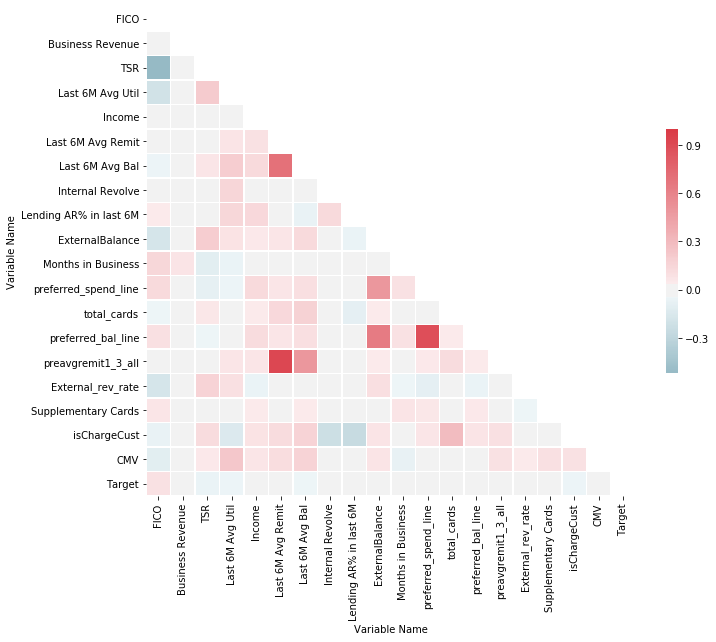

In [263]:
# Correlation Matrix

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [264]:
# Dropping correlated column
correlation = ['preavgremit1_3_all', 'preferred_spend_line']
for col in correlation:
    data.drop(col, axis=1, inplace=True)

In [265]:
# Null values
nullValueCount = data.isnull().sum()
nullValuesPercentage = nullValueCount/data.shape[0] * 100
nullValuesPercentage

Variable Name
FICO                       2.826471
Business Revenue           9.955882
TSR                       36.747059
Last 6M Avg Util           0.002941
Income                    10.279412
Last 6M Avg Remit          2.455882
Last 6M Avg Bal            2.455882
Internal Revolve          46.520588
Lending AR% in last 6M    13.382353
ExternalBalance           22.250000
Months in Business        30.888235
total_cards                0.802941
preferred_bal_line        23.600000
External_rev_rate         65.276471
Supplementary Cards        0.000000
isChargeCust               0.000000
CMV                        0.000000
Target                     0.000000
dtype: float64

In [266]:
# Dropping column with high percentage of null values
index = 0
for percent in nullValuesPercentage:
    if abs(percent) > 31.0:
        data.drop(data.columns[index], axis=1, inplace=True)
    else:
        index = index + 1
nullValueCount = data.isnull().sum()
nullValuesPrecentage = nullValueCount/data.shape[0] * 100
nullValuesPrecentage

Variable Name
FICO                       2.826471
Business Revenue           9.955882
Last 6M Avg Util           0.002941
Income                    10.279412
Last 6M Avg Remit          2.455882
Last 6M Avg Bal            2.455882
Lending AR% in last 6M    13.382353
ExternalBalance           22.250000
Months in Business        30.888235
total_cards                0.802941
preferred_bal_line        23.600000
Supplementary Cards        0.000000
isChargeCust               0.000000
CMV                        0.000000
Target                     0.000000
dtype: float64

In [267]:
# Numerical attributes
numAttributes = list(data.columns)
for col in catAttributes:
    numAttributes.remove(col)
numAttributes

['FICO',
 'Business Revenue',
 'Last 6M Avg Util',
 'Income',
 'Last 6M Avg Remit',
 'Last 6M Avg Bal',
 'Lending AR% in last 6M',
 'ExternalBalance',
 'Months in Business',
 'total_cards',
 'preferred_bal_line',
 'Supplementary Cards',
 'CMV']

In [268]:
# Imputing null values
data[numAttributes] = data[numAttributes].fillna(0)

nullValueCount = data.isnull().sum()
nullValuesPrecentage = nullValueCount/data.shape[0] * 100
nullValuesPrecentage

Variable Name
FICO                      0.0
Business Revenue          0.0
Last 6M Avg Util          0.0
Income                    0.0
Last 6M Avg Remit         0.0
Last 6M Avg Bal           0.0
Lending AR% in last 6M    0.0
ExternalBalance           0.0
Months in Business        0.0
total_cards               0.0
preferred_bal_line        0.0
Supplementary Cards       0.0
isChargeCust              0.0
CMV                       0.0
Target                    0.0
dtype: float64

In [269]:
# Standardizing variable
scaler = StandardScaler()
scaler.fit(data[numAttributes])
data[numAttributes]=scaler.transform(data[numAttributes])

<a list of 10 Patch objects>

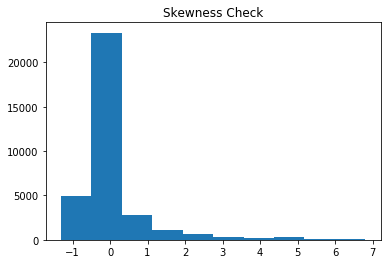

In [270]:
# Skewness
plt.title("Skewness Check")
plt.hist(data.CMV)[2]

In [271]:
# Performing train-test split on the data
X, y = data.loc[:,data.columns!='Target'].values, data.loc[:,'Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#To get the distribution in the target in train and test
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

2    12780
1     8428
0     2592
dtype: int64
2    5392
1    3653
0    1155
dtype: int64


## Building a  Basic Decision Tree Model

In [272]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [273]:
# Features importance data frame
features = data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([data.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,CMV,FICO,Last 6M Avg Bal,Last 6M Avg Remit,Last 6M Avg Util,preferred_bal_line,ExternalBalance,Income,Business Revenue,Months in Business,total_cards,Lending AR% in last 6M,Supplementary Cards,isChargeCust
1,0.147257,0.106504,0.097415,0.0974075,0.0863342,0.0809496,0.0798297,0.0768569,0.074872,0.0687664,0.0281633,0.0239415,0.0223207,0.00938214


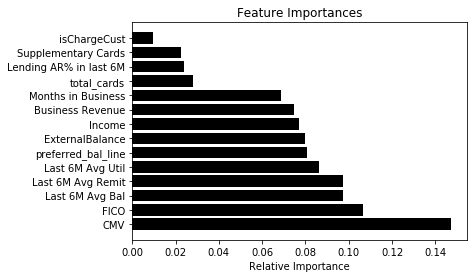

In [274]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Testing Perfomance

In [275]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [277]:
def matrices():
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    print(confusion_matrix_train,"\n")
    print(confusion_matrix_test,"\n")
    
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    print("Train Accuracy: ",Accuracy_Train,"\n")

    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    print("Test Accuracy: ",Accuracy_Test)

In [278]:
matrices()

[[ 2592     0     0]
 [    0  8428     0]
 [    0     0 12780]] 

[[ 197  362  596]
 [ 364 1545 1744]
 [ 620 1772 3000]] 

Train Accuracy:  1.0 

Test Accuracy:  0.7058346839546191


## Building Decision Tree Model using Feature Importance

In [338]:
select = indices[0:10]
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train[:,select], y_train)

In [339]:
train_pred = clf.predict(X_train[:,select])
test_pred = clf.predict(X_test[:,select])

In [341]:
matrices()

[[   29   449  2114]
 [    2  2849  5577]
 [   13  2625 10142]] 

[[  11  208  936]
 [   2 1198 2453]
 [   7 1151 4234]] 

Train Accuracy:  0.8645238810453589 

Test Accuracy:  0.8520084566596194


## Building Random Forest Model

In [396]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [397]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [398]:
matrices()

[[    4   243  2345]
 [    0  2064  6364]
 [    0  1283 11497]] 

[[   0   96 1059]
 [   0  884 2769]
 [   0  584 4808]] 

Train Accuracy:  0.8948507139766335 

Test Accuracy:  0.9020408163265307
